In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [8]:
import pandas as pd
df = pd.read_csv('Product Positioning.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB
None


In [9]:
df.isnull().sum(axis=0)

Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64

In [10]:
df = df.drop("Product ID", axis = 1)
categorical_features = []
numerical_features = []
for col in df.columns:
  if df[col].dtype == 'O':
    categorical_features.append(col)
  else:
    numerical_features.append(col)
print('categorical: ',categorical_features)
print('num_f: ',numerical_features)

categorical:  ['Product Position', 'Promotion', 'Foot Traffic', 'Consumer Demographics', 'Product Category', 'Seasonal']
num_f:  ['Price', "Competitor's Price", 'Sales Volume']


In [11]:
for feature in categorical_features:
  print(df[feature].unique())

['Aisle' 'End-cap' 'Front of Store']
['No' 'Yes']
['Medium' 'Low' 'High']
['Families' 'Seniors' 'Young adults' 'College students']
['Clothing' 'Electronics' 'Food']
['No' 'Yes']


In [12]:
for columns in df.columns:
  if df[columns].isnull().sum()>0 and df[columns].dtype !='O':
    df[columns].fillna(df[columns].mean(),inplace=True)
df.isnull().sum()

Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64

In [13]:
df.head()

,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


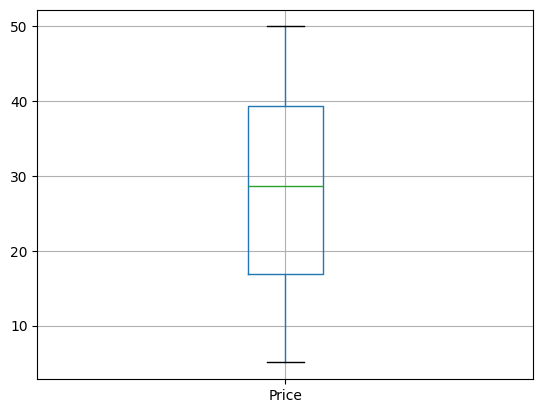

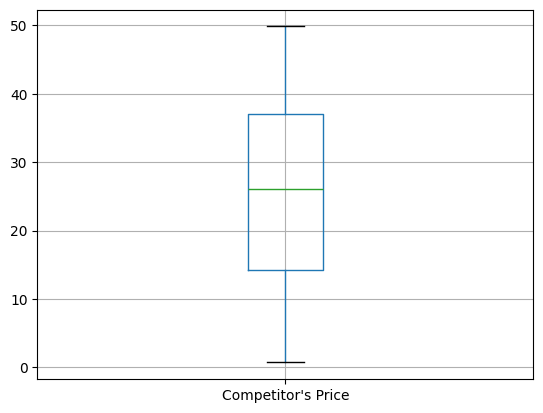

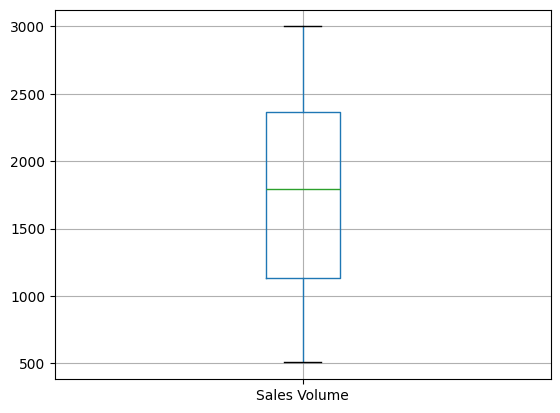

In [14]:
for feature in numerical_features:
  df.boxplot(feature)
  plt.show()

In [15]:
for feature in numerical_features:
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  upper_bound = df[feature].quantile(0.75) + 1.5 * IQR
  lower_bound = df[feature].quantile(0.25) - 1.5 * IQR

  df.loc[df[feature] >= upper_bound, feature] = upper_bound
  df.loc[df[feature] < lower_bound, feature] = lower_bound

C:\Users\Parthib Chowdhury\AppData\Local\Temp\ipykernel_15368\2457246541.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4204.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] >= upper_bound, feature] = upper_bound


In [16]:
for feature in numerical_features:
  df[feature] = np.log1p(df[feature])

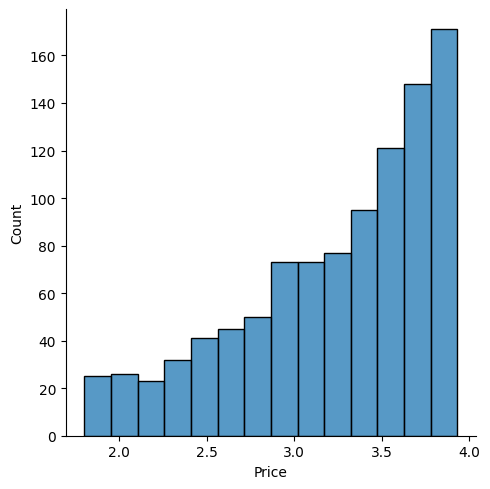

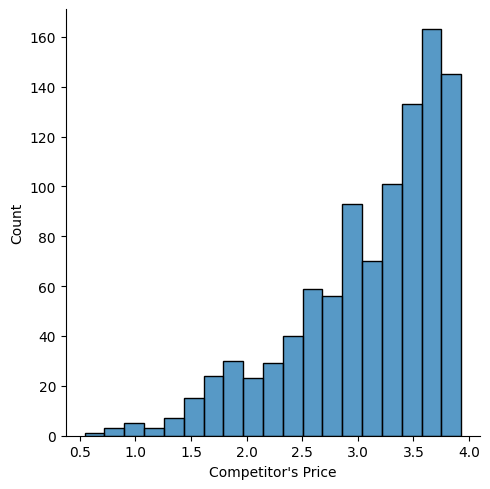

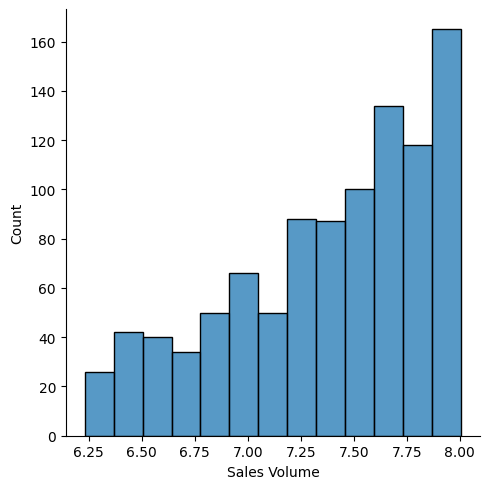

In [17]:
for feature in numerical_features:
  sns.displot(df[feature])
  plt.show()

In [18]:
X = df.drop(columns = 'Product Position')
y = df['Product Position']

X = pd.get_dummies(X, drop_first= True)
X

,Price,Competitor's Price,Sales Volume,Promotion_Yes,Foot Traffic_Low,Foot Traffic_Medium,Consumer Demographics_Families,Consumer Demographics_Seniors,Consumer Demographics_Young adults,Product Category_Electronics,Product Category_Food,Seasonal_Yes
0,2.894253,2.842581,7.945910,False,False,True,True,False,False,False,False,False
1,2.912894,2.648300,6.484635,False,True,False,False,True,False,False,False,False
2,3.787819,3.673004,7.705713,True,False,True,False,False,True,True,False,True
3,3.767228,3.688379,7.358194,True,True,False,True,False,False,False,False,True
4,3.890595,3.841386,7.987185,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.530517,2.262804,7.033506,False,False,True,True,False,False,True,False,True
996,3.886090,3.866607,6.338594,False,False,True,False,False,False,False,True,True
997,3.104587,2.981126,6.792344,True,False,False,False,True,False,True,False,False
998,3.170526,3.002211,7.839526,False,False,True,False,True,False,True,False,True


In [19]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

y

C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 2,
       0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0,
       0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2,
       1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2,
       1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1,

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

Train set size: 800
Test set size: 200


In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

estimators = []
lg = LogisticRegression(solver ='lbfgs',multi_class ='multinomial', max_iter = 200)
estimators.append(("Lg", lg))

sv = SVC(kernel = 'linear')
estimators.append(("SVM", sv))

rf = RandomForestClassifier()
estimators.append(("RF", rf))

estimators.append(('DTC', DecisionTreeClassifier()))

model = VotingClassifier(estimators = estimators, voting ='hard')

In [27]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')

C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dty

List of possible accuracy: [0.33, 0.29, 0.29, 0.36, 0.3, 0.38, 0.33, 0.32, 0.32, 0.34]

Maximum Accuracy That can be obtained from this model is: 38.0 %


In [28]:
y_pred = model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred)
y_pred

C:\Python3.10\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Python3.10\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Python3.10\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature nam

array(['Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle', 'Aisle',
       'Aisle', 'Ais

In [29]:
model.predict([[17.07, 16.16, 2823, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

array([0])

Pickling the file:

In [26]:
import pickle
file = open('ensemble_learning.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)